In [1]:
# Libraries used
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('Assignment#1_data (1).csv')
data.head()

,Dosage (mL),Symptomatic Days
0,0.0,12.0
1,0.0,11.0
2,0.0,11.0
3,0.0,10.0
4,0.0,12.0


In [3]:
data.describe()

,Dosage (mL),Symptomatic Days
count,68.000000,68.000000
mean,0.527693,10.328685
std,0.303559,1.663422
min,0.000000,7.223388
25%,0.345000,8.991852
50%,0.551176,10.045220
75%,0.763312,11.740819
max,0.971710,13.700000


In [16]:
data['X'] = data['Dosage (mL)']
data['Y'] = data['Symptomatic Days']
len(data['X'])

68

In [17]:
X = data['X'].sum()
Y = data['Y'].sum()
X_square = ((data['X'])*(data['X'])).sum()
Y_square = ((data['Y'])*(data['Y'])).sum()
XY = ((data['X'])*(data['Y'])).sum()
X,Y,X_square, Y_square, XY

(35.883133267,
 702.350600181,
 25.109189653737396,
 7439.745497145529,
 354.04529924447246)

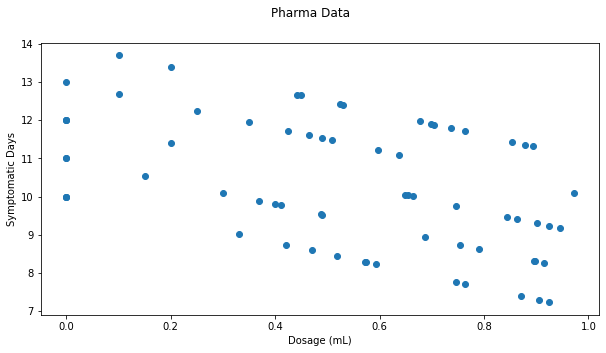

In [18]:
plt.figure(figsize=(10,5))
plt.suptitle('Pharma Data')
plt.xlabel('Dosage (mL)')
plt.ylabel('Symptomatic Days')
plt.scatter(data['X'],data['Y'])

# Inference from the graph

At low dosage it shows high symptomatic days and at the same time when the dosage increases the symptomatic days is reducing drastically. For example, at 0 dosage the symtomatic days is 10 to 13, however, the symtomatic days reduced to 7 to 10 when the dossge increased to 1 mL.  So this data tells that the company's new drug can reduce the sytomatic days effectively. 


# The correaltion coefficient

In [19]:
r = (68*XY - (X*Y)) / ((math.sqrt((68*X_square)-(X*X))) * (math.sqrt((68*Y_square) - (Y*Y))))
r

-0.4900859972495904

Inference

There is a negative correlation between dosage and symptomatic days, which means when dosage increases the symptomatic days decreases, the drug seems to be effective, however, the r value is close to .5, eventhough, the correlation does not imply causation. 


# Models

# Linear Regression

In [20]:
m = ((68*XY) - (X*Y)) /((68*X_square) -(X*X))
m

-2.6855430475987916

In [21]:
b = (Y - m*X)/68
b

11.745827930180187

In [22]:
data['Predicted_Y'] = data['X']*m + b

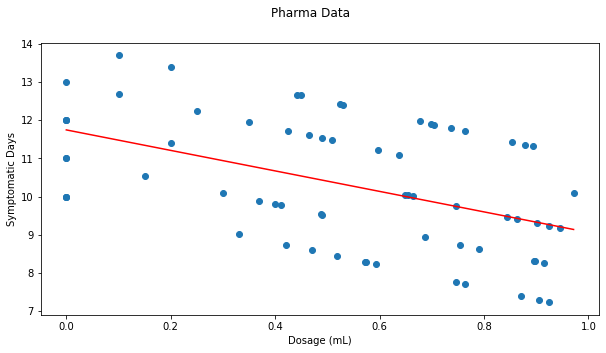

In [23]:
plt.figure(figsize=(10,5))
plt.suptitle('Pharma Data')
plt.xlabel('Dosage (mL)')
plt.ylabel('Symptomatic Days')
plt.scatter(data['X'],data['Y'])

z = np.polyfit(data['X'],data['Y'], 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(data['X'], data['Predicted_Y'], color = 'r')

# Residuals

In [28]:
data['Residuals'] = data['Y'] - data['Predicted_Y']

In [29]:
data['Ranked_Residuals'] = data['Residuals'].sort_values(ascending=False).values
data.head()

,Dosage (mL),Symptomatic Days,Y,X,Predicted_Y,Residuals,Ranked_Residuals
0,0.0,12.0,12.0,0.0,11.745828,0.254172,2.222726
1,0.0,11.0,11.0,0.0,11.745828,-0.745828,2.191281
2,0.0,11.0,11.0,0.0,11.745828,-0.745828,2.115123
3,0.0,10.0,10.0,0.0,11.745828,-1.745828,2.112666
4,0.0,12.0,12.0,0.0,11.745828,0.254172,2.089169


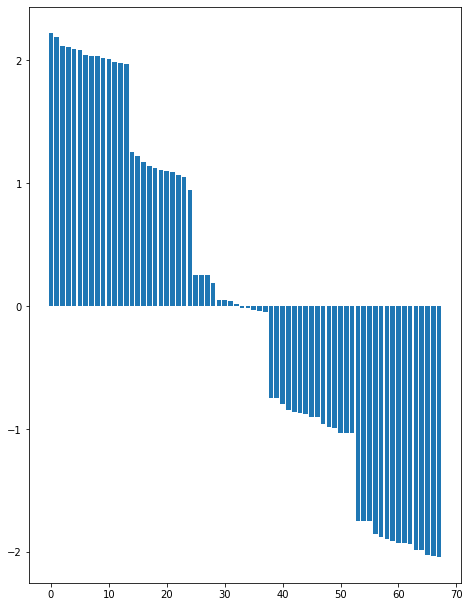

In [58]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,2])
ax.bar(range(len(data)),data['Ranked_Residuals'])
plt.show()

# Residual Interpretation


The residuals of this model show a range of -2 to 2.

In [30]:
import numpy as np
MSE = np.square(np.subtract(data['Y'],data['Predicted_Y'])).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

1.4392609044930562


# Gradient Descent

In [32]:
m = 0 # Initially

c = 0

L = 0.0001

epochs = 1000000 # Number of iterations, better to increase the epochs for smaller values of L



Dependent = data['Y']
Independent = data['X']

n = float(len(Independent))

for i in range(epochs):
    Y_predicted = m*Independent + c
    D_m = (-2/n) * sum(Independent * (Dependent - Y_predicted))
    D_c = (-2/n) * sum(Dependent - Y_predicted)
    m = m - (L*D_m)
    c = c - (L*D_c)


    
print("m {}, b {}, iteration {}".format(m,c,i))


m -2.6855370167807595, b 11.745824508685526, iteration 999999


In [33]:
data['Predicted_Y_Grad'] = m*data['X'] + c
MSE = np.square(np.subtract(data['Y'],data['Predicted_Y_Grad'])).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

1.4392609044942233


# Inferences and Interpretations


1) The slope coefficient m = -2.6855 represents the mean decrease in the number of symptomatic days for every additional one mL in dosage. If your dosage increases by 1 mL, the average number of symptomatic days decreases approximately by two and half days.

2) The intercept term b = 11.7458, that is the change in Y when X=0 i.e, change in Y when there is no influence of X. In here, when the dosage is zero, the symptomatic days will be increased approximately by 11 and half days.
 
            
            
# Conclusion

The given data shows a favourable support to the pharma company, because it has a negative slope towards the number of symptomatic days when compairing with the dosage. However, Health Canada needs to cross check the effieciency of drug by adding moore data and the side effect of the drug as well. 